### Задание
    1. Загрузить данные
    2. Скопировать loss и индексы
    3. Объединить в data
    4. Посмотреть распределение категориальных данных, выделить аномалии
    5. Посмотреть гистограммы вещественных данных, выделить аномалии
    6. Закодировать категориальные данные (factorize, get_dummies)
    7. Сделать валидацию на 5 фолдов
    8. Обучить классификатор
    9. Получить cv, отправить решение
    10. XGBoost

In [1]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('./data/train.csv', index_col='id')
test = pd.read_csv('./data/test.csv', index_col='id')

## Предобработка и исследование данных

In [3]:
print train.shape
train.head()

(188318, 131)


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [5]:
for c in train.select_dtypes(include=['object']).columns:
    print train[c].value_counts()

A    141550
B     46768
Name: cat1, dtype: int64
A    106721
B     81597
Name: cat2, dtype: int64
A    177993
B     10325
Name: cat3, dtype: int64
A    128395
B     59923
Name: cat4, dtype: int64
A    123737
B     64581
Name: cat5, dtype: int64
A    131693
B     56625
Name: cat6, dtype: int64
A    183744
B      4574
Name: cat7, dtype: int64
A    177274
B     11044
Name: cat8, dtype: int64
A    113122
B     75196
Name: cat9, dtype: int64
A    160213
B     28105
Name: cat10, dtype: int64
A    168186
B     20132
Name: cat11, dtype: int64
A    159825
B     28493
Name: cat12, dtype: int64
A    168851
B     19467
Name: cat13, dtype: int64
A    186041
B      2277
Name: cat14, dtype: int64
A    188284
B        34
Name: cat15, dtype: int64
A    181843
B      6475
Name: cat16, dtype: int64
A    187009
B      1309
Name: cat17, dtype: int64
A    187331
B       987
Name: cat18, dtype: int64
A    186510
B      1808
Name: cat19, dtype: int64
A    188114
B       204
Name: cat20, dtype: int64
A    1879

### На что обратить внимание
    1. Признаки где много значений: cat109, cat110, cat112, cat113, cat116
    2. Проверить это признаки на совпадение значений
    3. Понять, что могут означать эти аббревиатуры
    4. Ввести признаки означающие совпадение этих признаков
    
**КРОМЕ ТОГО** перед тем, как делать преобразования объединим train + test, чтобы не было несостыковок, а потом разъединим

In [3]:
# объединям данные
train_index = train.index
test_index = test.index
loss = train.loss

In [4]:
data = train.drop('loss',1).append(test)

In [8]:
data.shape

(313864, 130)

### Посмотри гистограммы 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1121510d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112405390>], dtype=object)

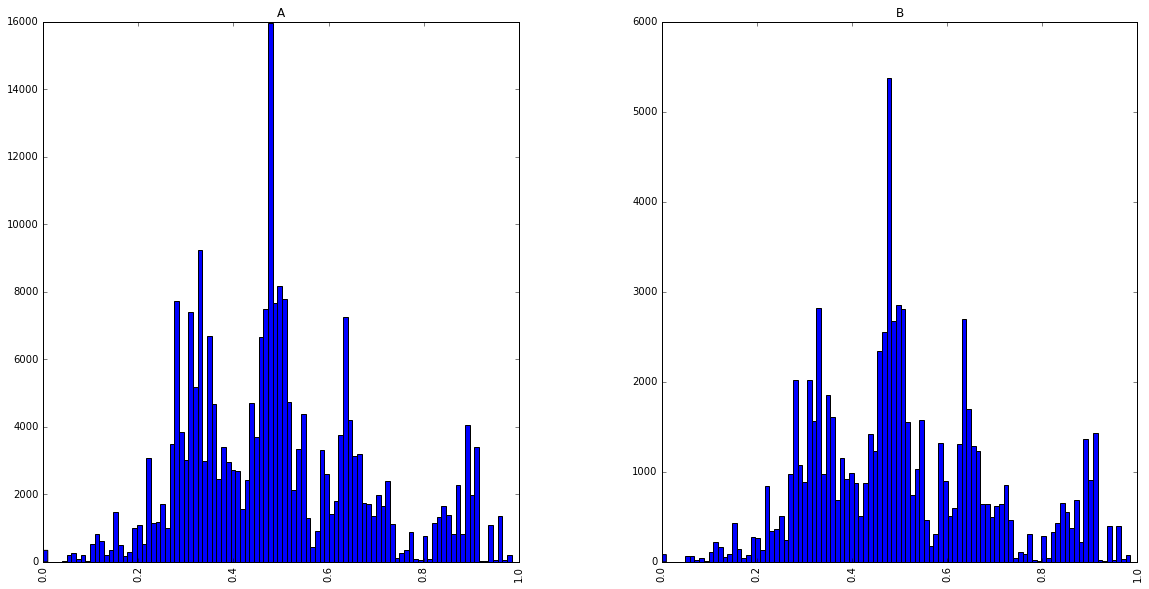

In [12]:
# можно так же смотреть и в разбивке по другому столбцу
data[cont_columns[0]].hist(bins=100,by=data['cat1'], figsize=(19,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127cc6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b90250>]], dtype=object)

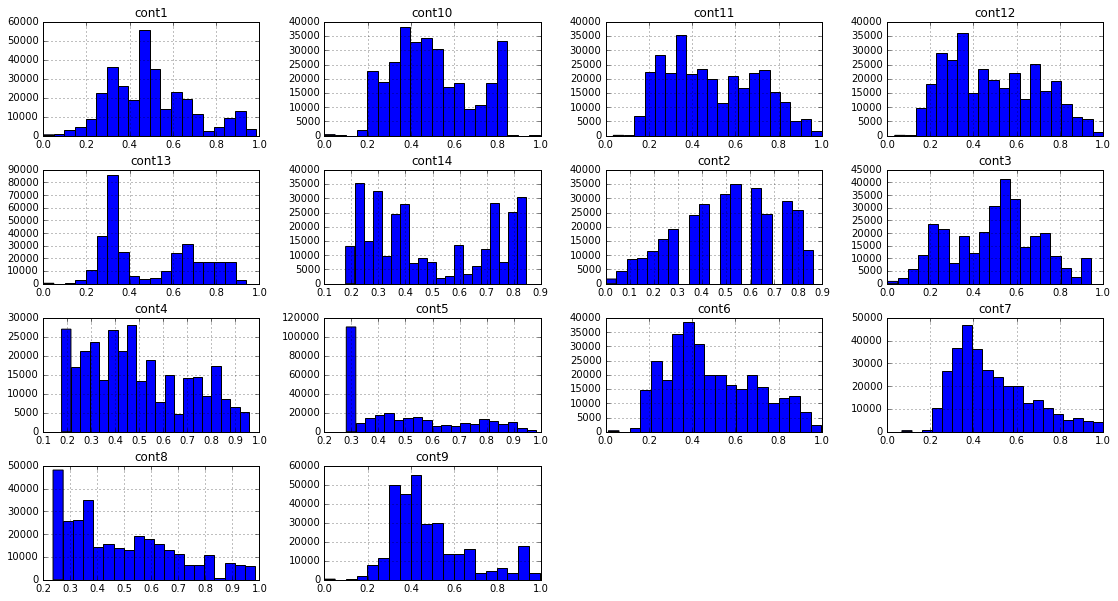

In [13]:
# мы видим, что распределение годное, нету выбросов
data[cont_columns].hist(bins=20, figsize=(19,10))

### Простой способ
    Те, у кого значений меньше n == 15 сделать get_dummies, остальные отбросить

In [5]:
# сохраним для будущи обработок все категориальные значения в виде DataFrame
cat_columns = data.select_dtypes(include=['object']).columns
cont_columns = data.select_dtypes(exclude=['object']).columns
data_cat = data.select_dtypes(include=['object'])

In [6]:
unique_threshold = 15
for column in cat_columns:
    if len(data[column].unique()) > unique_threshold:
        data = data.drop(column, 1)
        continue
    dummies = pd.get_dummies(data[column])
    dummies.columns = [column + '_' + d_c for d_c in dummies.columns]
    data[dummies.columns] = dummies
    data = data.drop(column, 1)

In [7]:
# 450 признаков это 
data.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat108_B,cat108_C,cat108_D,cat108_E,cat108_F,cat108_G,cat108_H,cat108_I,cat108_J,cat108_K
id,,,,,,,,,,,,,,,,,,,,,
1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Кросс-Валидация

In [8]:
from sklearn.cross_validation import KFold # в разынх версиях sklearn МОГУТ БЫТЬ ОТЛИЧИЯ
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error # наша метрика

from sklearn import grid_search

### Собственноручная

In [9]:
train = data.loc[train_index]
test = data.loc[test_index]

## Разобьем на train valid test

In [15]:
from sklearn.cross_validation import train_test_split # в разных версиях sklearn слегка отличается
X_train, X_valid, y_train, y_valid = train_test_split(train,
                                                    loss, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
np.all(np.isfinite(data.values))

In [11]:
kf = KFold(len(train_index), n_folds=3, shuffle=True, random_state=42)

In [12]:
for train_i, test_i in kf:
    print train_i.shape
    print test_i.shape
    print train_i
    X_train = train.iloc[train_i]
    X_test = train.iloc[test_i]
    y_train = loss.iloc[train_i]
    y_test = loss.iloc[test_i]
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    y_true = y_test
    y_pred = dtr.predict(X_test)
    sc = mean_absolute_error(y_true, y_pred)
    print sc

(125545,)
(62773,)
[     1      2      3 ..., 188313 188316 188317]
1739.53338004
(125545,)
(62773,)
[     0      1      2 ..., 188314 188315 188316]
1751.4150004
(125546,)
(62772,)
[     0      3      4 ..., 188314 188315 188317]
1730.48208787


### GridSearchCV

In [10]:
X_train = train
y_train = loss

In [13]:
parameters = {'max_depth':[3,4,5]}
dtr = DecisionTreeRegressor()
clf = grid_search.GridSearchCV(dtr, parameters, scoring='mean_absolute_error', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='mean_absolute_error', verbose=0)

In [14]:
clf.grid_scores_

[mean: -1514.15814, std: 5.18022, params: {'max_depth': 3},
 mean: -1484.00460, std: 10.83302, params: {'max_depth': 4},
 mean: -1451.35196, std: 8.35714, params: {'max_depth': 5}]

In [15]:
bst = clf.best_estimator_

In [16]:
bst.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [17]:
preds = bst.predict(test)

In [24]:
sample_submission = pd.read_csv('./data/sample_submission.csv',index_col='id')
sample_submission['loss'] = preds
sample_submission.to_csv('./ss_grid_1.csv')

### XGBoost

http://www.machinelearning.ru/wiki/images/9/9a/fonarev.overview_of_boosting_methods.pdf

http://xgboost.readthedocs.io/en/latest/python/python_intro.html

http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [31]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid, y_valid)
dtest = xgb.DMatrix(test)

https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

In [41]:
from sklearn.metrics import mean_absolute_error

param = {'bst:max_depth':5, 'bst:eta':0.3, 'silent':1, "objective": "reg:linear" }
param['nthread'] = 4
#param['eval_metric'] = 'mae'

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'error', mean_absolute_error(labels, preds)

In [42]:
evallist  = [(dvalid,'valid'), (dtrain,'train')]

In [43]:
num_round = 300
bst = xgb.train(param, dtrain, num_round, evallist,feval=evalerror )

[0]	valid-error:2163.468262	train-error:2157.730469
[1]	valid-error:1693.298828	train-error:1686.110596
[2]	valid-error:1475.308350	train-error:1468.099365
[3]	valid-error:1377.930176	train-error:1370.568115
[4]	valid-error:1336.527588	train-error:1328.728760
[5]	valid-error:1320.469238	train-error:1310.751831
[6]	valid-error:1309.564209	train-error:1299.570068
[7]	valid-error:1298.062012	train-error:1287.360107
[8]	valid-error:1289.755371	train-error:1278.588989
[9]	valid-error:1286.331787	train-error:1273.953857
[10]	valid-error:1277.948120	train-error:1264.601562
[11]	valid-error:1273.075806	train-error:1259.094116
[12]	valid-error:1265.304321	train-error:1250.801270
[13]	valid-error:1260.747681	train-error:1245.093750
[14]	valid-error:1256.162842	train-error:1239.555542
[15]	valid-error:1250.789673	train-error:1233.449219
[16]	valid-error:1248.488525	train-error:1230.771484
[17]	valid-error:1245.339844	train-error:1226.424561
[18]	valid-error:1241.718140	train-error:1221.857056
[19